In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #FOR PLOTTING (VISUALISATION)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

df.isnull().sum()  #counting for null values in data set 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1]we can determine that the mean average age in titanic ship that aboarded was 29 while  max was 80 

2]Number of Siblings/Spouses Aboard was max of 8 people 

3] while maximum Fare was 512 dollors

4] while parent child boared in titanic was  range from with min(1) and max(8)

##  A]  EDA

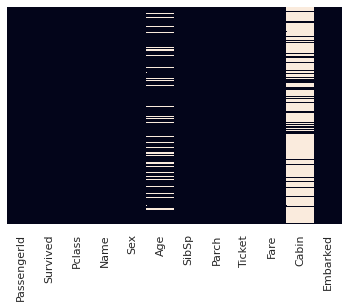

In [ ]:
sns.heatmap(df.isna(),cbar=False,annot=False, yticklabels=False)     #Checking for nan values in dataframe

In [ ]:
df.corr()["Survived"].sort_values()      

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

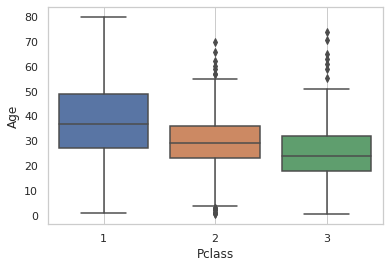

In [ ]:
sns.boxplot(x="Pclass",y="Age",data=df)
plt.grid()

In [ ]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if (pd.isnull(Age)):
        if (Pclass==1):
            return 37
        elif (Pclass==2):
            return 29
        else:
            return 24
        
    else:
        return Age

In [ ]:
df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
df.isna().sum() # now checking for nan values after EDA  

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df.dropna(inplace=True) # removing nan values

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.notna().sum()

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            889
SibSp          889
Parch          889
Ticket         889
Fare           889
Embarked       889
dtype: int64

In [ ]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [ ]:
df                 #Final DataSet

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# B] VISUALISATION  

# Count of survived people

Text(0, 0.5, 'Counts')

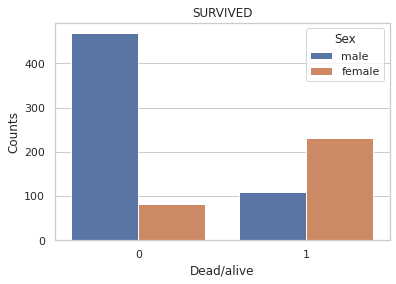

In [ ]:
sns.countplot(x="Survived",hue="Sex",data=df)

plt.title("SURVIVED")
plt.xlabel("Dead/alive")
plt.ylabel("Counts")


## People affected according to class

Text(0, 0.5, 'Counts')

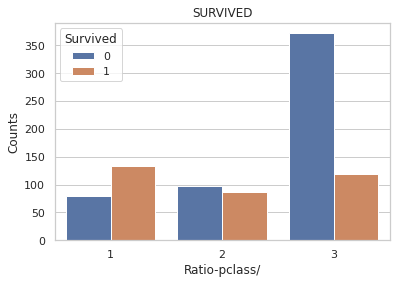

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x="Pclass",hue="Survived",data=df)

plt.title("SURVIVED")
plt.xlabel("Ratio-pclass/")
plt.ylabel("Counts")

## Counting the ticket prices

In [ ]:
df.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

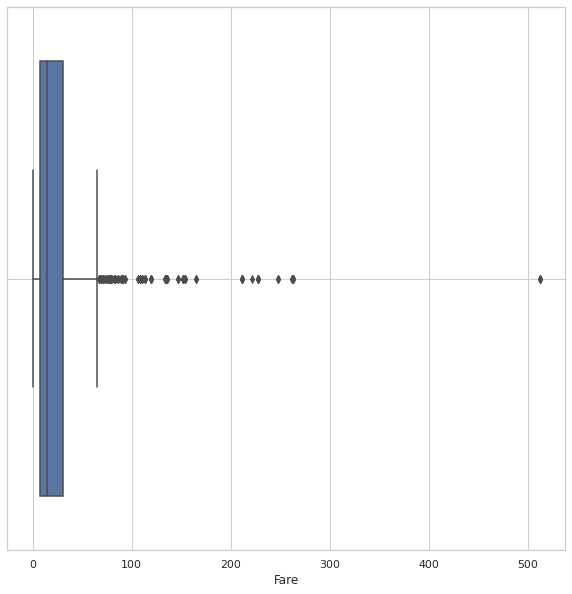

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Fare",data=df)
plt.grid(True)

##  Number of Siblings/Spouses Aboard

Text(0, 0.5, 'NO OF PEOPLE')

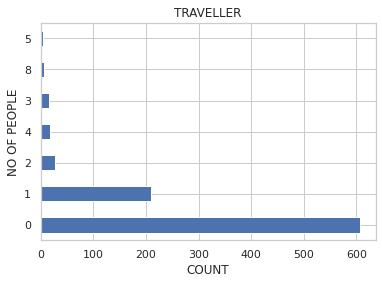

In [ ]:
df.SibSp.value_counts().plot(kind="barh")
plt.title("TRAVELLER")
plt.xlabel("COUNT")
plt.ylabel("NO OF PEOPLE")

In [ ]:
df.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

## Number of Parents/Children Aboard

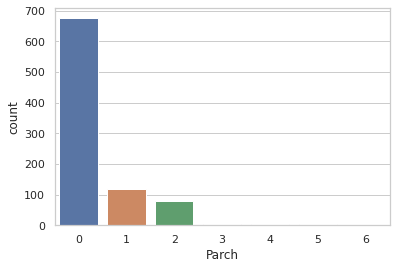

In [ ]:
sns.countplot(x="Parch",data=df)

In [ ]:
df.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# C] BUILDING THE MODEL

## SEPERATING THE FEATURES AND LABELS

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,24.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

## Converting data into numerical using Encoder

In [ ]:
from sklearn.compose import ColumnTransformer     
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),["Sex","Embarked"])],remainder="passthrough")
x=np.array(ct.fit_transform(x))

In [ ]:
x

array([[ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

# Splitting into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

## Creating the best model with help of logistic,knn and svc

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
def my_models(model):   #creating function
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    print(f"{accuracy_score(ytest,ypred)}\n\n{classification_report(ytest,ypred)}\n\n{confusion_matrix(ytest,ypred)}")

In [ ]:
model=[]
model.append(("knn-------",KNeighborsClassifier()))
model.append(("logistic-------",LogisticRegression()))
model.append(("support vector-------",SVC()))


for name,model in model:
    print(name)
    my_models(model)

knn-------
0.7219730941704036

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       138
           1       0.65      0.60      0.62        85

    accuracy                           0.72       223
   macro avg       0.70      0.70      0.70       223
weighted avg       0.72      0.72      0.72       223


[[110  28]
 [ 34  51]]
logistic-------
0.8430493273542601

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       138
           1       0.79      0.80      0.80        85

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223


[[120  18]
 [ 17  68]]
support vector-------
0.6502242152466368

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       138
           1       0.56      0.38      0.45        85

    accuracy             

## D] HYPER PARAMETER 

In [ ]:
accuracy=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

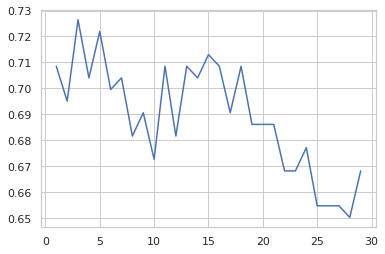

In [ ]:
plt.plot(range(1,30),accuracy)
plt.grid(True)

1] Above graph show 3 has maximum accuracy so  selecting 3 as n_neighbors

## Using of hyperparameter in model for better results

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
para={"C":[0.1,1,10,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001],"kernel":['rbf']}

grid=GridSearchCV(SVC(),para,refit=True,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.619, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.617, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.617, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.617, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.619, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.649, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.662, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.669, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.692, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.662, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.679, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.669, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid.best_params_   #using this parameter for tuning in svm

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
model=[]
model.append(("knn-------",KNeighborsClassifier(n_neighbors=3)))
model.append(("logistic-------",LogisticRegression(solver='newton-cg')))
model.append(("support vector-------",SVC(C=100, gamma=0.001,kernel='rbf')))


for name,model in model:
    print(name)
    my_models(model)

knn-------
0.726457399103139

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       138
           1       0.64      0.65      0.64        85

    accuracy                           0.73       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.73      0.73      0.73       223


[[107  31]
 [ 30  55]]
logistic-------
0.852017937219731

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       138
           1       0.80      0.81      0.81        85

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223


[[121  17]
 [ 16  69]]
support vector-------
0.8295964125560538

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       138
           1       0.76      0.80      0.78        85

    accuracy               

ANN MODEL

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le1=LabelEncoder()

x[:,2] = le.fit_transform(x[:,2])
x[:,7] = le1.fit_transform(x[:,7])

In [ ]:
import tensorflow as tf
ann=tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(units=30,activation="relu"))
ann.add(tf.keras.layers.Dense(units=15,activation="relu"))
ann.add(tf.keras.layers.Dense(units=13,activation="relu"))
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(xtrain,ytrain,batch_size=40,epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 2ms/step - loss: 1.2328 - accuracy: 0.5090
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.6456
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.7012
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.6967
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.6982
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7147
Epoch 7/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7117
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5685 - accuracy: 0.7117
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7102
Epoch 10/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5595 - accuracy: 0.7162
Epoch 11/

In [ ]:
ypred=ann.predict(xtest)

In [ ]:
ypred=(ypred>0.5)

In [ ]:
from sklearn.metrics import classification_report
cs=classification_report(ytest,ypred)

In [ ]:
print(cs)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       138
           1       0.71      0.79      0.75        85

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.79       223
weighted avg       0.80      0.80      0.80       223



### PARAMETER TUNNING

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=30,activation='relu'))
model.add(tf.keras.layers.Dense(units=15,activation='relu'))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')



In [ ]:
model.fit(xtrain,ytrain, epochs=600, validation_data=(xtest,ytest))

Epoch 1/600
21/21 [==============================] - 0s 8ms/step - loss: 4.0070 - val_loss: 2.6654
Epoch 2/600
21/21 [==============================] - 0s 2ms/step - loss: 1.2252 - val_loss: 0.8880
Epoch 3/600
21/21 [==============================] - 0s 3ms/step - loss: 0.7918 - val_loss: 0.7637
Epoch 4/600
21/21 [==============================] - 0s 2ms/step - loss: 0.6936 - val_loss: 0.7182
Epoch 5/600
21/21 [==============================] - 0s 2ms/step - loss: 0.6559 - val_loss: 0.6700
Epoch 6/600
21/21 [==============================] - 0s 2ms/step - loss: 0.6169 - val_loss: 0.6431
Epoch 7/600
21/21 [==============================] - 0s 3ms/step - loss: 0.6002 - val_loss: 0.5882
Epoch 8/600
21/21 [==============================] - 0s 2ms/step - loss: 0.5822 - val_loss: 0.5884
Epoch 9/600
21/21 [==============================] - 0s 3ms/step - loss: 0.5689 - val_loss: 0.6156
Epoch 10/600
21/21 [==============================] - 0s 3ms/step - loss: 0.6017 - val_loss: 0.5521
Epoch 11/

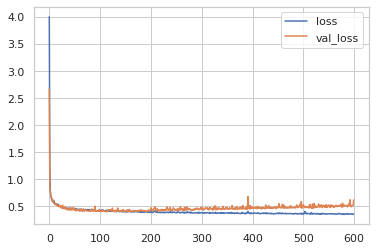

In [ ]:
losdf = pd.DataFrame(model.history.history)
losdf.plot()

In [ ]:
earlystop = EarlyStopping(monitor='val_loss',mode='min',
                          verbose=1,patience=25)

In [ ]:
model.fit(xtrain,ytrain, epochs=600, 
          validation_data=(xtest,ytest),
          callbacks=[earlystop])

Epoch 1/600
21/21 [==============================] - 0s 6ms/step - loss: 4.6953 - val_loss: 1.6662
Epoch 2/600
21/21 [==============================] - 0s 3ms/step - loss: 1.0312 - val_loss: 0.8154
Epoch 3/600
21/21 [==============================] - 0s 2ms/step - loss: 0.6736 - val_loss: 0.6816
Epoch 4/600
21/21 [==============================] - 0s 2ms/step - loss: 0.6275 - val_loss: 0.6506
Epoch 5/600
21/21 [==============================] - 0s 2ms/step - loss: 0.6045 - val_loss: 0.6415
Epoch 6/600
21/21 [==============================] - 0s 3ms/step - loss: 0.5877 - val_loss: 0.6166
Epoch 7/600
21/21 [==============================] - 0s 3ms/step - loss: 0.5744 - val_loss: 0.5970
Epoch 8/600
21/21 [==============================] - 0s 2ms/step - loss: 0.5635 - val_loss: 0.6211
Epoch 9/600
21/21 [==============================] - 0s 2ms/step - loss: 0.5756 - val_loss: 0.7116
Epoch 10/600
21/21 [==============================] - 0s 2ms/step - loss: 0.5684 - val_loss: 0.6449
Epoch 11/

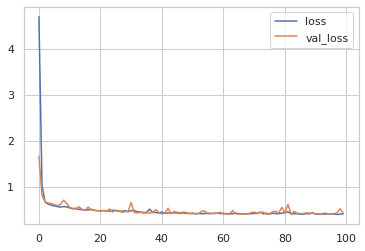

In [ ]:
modallodf = pd.DataFrame(model.history.history)
modallodf.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=30,activation='relu'))
model.add(Dropout(rate=0.7))

model.add(tf.keras.layers.Dense(units=15,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model.fit(xtrain,ytrain, epochs=600, 
          validation_data=(xtest,ytest),
          callbacks=[earlystop])

Epoch 1/600
21/21 [==============================] - 1s 7ms/step - loss: 10.2430 - val_loss: 6.4453
Epoch 2/600
21/21 [==============================] - 0s 2ms/step - loss: 7.7710 - val_loss: 3.3004
Epoch 3/600
21/21 [==============================] - 0s 2ms/step - loss: 5.9400 - val_loss: 1.3108
Epoch 4/600
21/21 [==============================] - 0s 3ms/step - loss: 5.0368 - val_loss: 0.7787
Epoch 5/600
21/21 [==============================] - 0s 2ms/step - loss: 3.8314 - val_loss: 0.7418
Epoch 6/600
21/21 [==============================] - 0s 2ms/step - loss: 3.2653 - val_loss: 0.8962
Epoch 7/600
21/21 [==============================] - 0s 3ms/step - loss: 2.6408 - val_loss: 0.9057
Epoch 8/600
21/21 [==============================] - 0s 3ms/step - loss: 2.8298 - val_loss: 0.8778
Epoch 9/600
21/21 [==============================] - 0s 2ms/step - loss: 2.2049 - val_loss: 0.8574
Epoch 10/600
21/21 [==============================] - 0s 2ms/step - loss: 1.9943 - val_loss: 0.8437
Epoch 11

In [ ]:
ypred = model.predict(xtest)
ypred = (ypred>0.5)

In [ ]:
cs=classification_report(ytest,ypred)
print(cs)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       138
           1       0.84      0.62      0.72        85

    accuracy                           0.81       223
   macro avg       0.82      0.78      0.79       223
weighted avg       0.82      0.81      0.80       223



# CONCLUSION 

A] PREPROCESSING


    1]we can determine that the mean average age in titanic ship that aboarded was 29 while max was 80

    2]Number of Siblings/Spouses Aboard was max of 8 people

    3] while maximum Fare was 512 dollors

    4] while parent child boared in titanic was range from with min(1) and max(8)
    
    
B] VISUALISATION


    1]No of people lossed there life were more than 500+ out of which 'male' was the most as of we can say that female and            children were resuced 1st -while only 300+ survived in the accident
        
    2]As people of 1st class has survived more in the incident as compare to that of 2nd and 3rd class people as 1st class have given first priority in boarding the rescue boat
    
    3]We can conclude that from data ticket price ranged from 0-75 dollar while maximum ticket sold was for 512 dollar,there         were many ticket sold in between 75-300 dollar this may be extra charges of last minute booking
    
    4] There were 5 such people having 8 sibling/spouses onboared with them,while 606 were without any siblings
    
    5]There were more than 600+couple in the ship while couple having 1 child with them were 118 and so on
    
    
C] BUILDING MODEL


    By using try and error
      -we can conclude that the accuarcy of the model by using [logistic Regression] the model give the maximum accuracy=85%
      -while that of using [svm]=82%
      -And of [knn]=72%


# RESULT

A] Before all the hyperparameter Tuning for LOGISTIC , KNN, SVM

    ACCURACY[KNN]==0.7219730941704036
    ACCURACY[LOGISTIC]==0.8430493273542601
    ACCURACY[SVC]==0.6502242152466368

B] After all the hyperparameter Tuning for LOGISTIC , KNN, SVM

    ACCURACY[KNN]==0.726457399103139
    ACCURACY[LOGISTIC]==0.852017937219731
    ACCURACY[SVC]=0.8295964125560538


c] ANN Model

      ACCURACY== 0.80

D] Hyperparameter Tuning of ann

      ACCURACY== 0.81
